# Task 2 : By The Sparks Foundation
### ------------------------------------------------------------------------------------------------------
## Prediction using Unsupervised ML

#### Name - Shivam Sharma
#### Email - shivamsharmarr31@gmail.com
#### Github - https://github.com/jongsuk0206shivam
#### LinkedIn - https://www.linkedin.com/in/shivamsharma1409/




In [14]:
#imprting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [15]:
#Loading dataset
df = pd.read_csv(r'C:\Users\Shivam Jong Suk\Downloads\iris.csv')

In [16]:
#analysing dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# looking for unique labels
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
df.shape

(150, 6)

In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
x = df.iloc[:,[1,2,3,4]].values

In [10]:
#applying kmeans to find the optimum no of clusters using elbow method
a = []

for i in range(1,11):
    cls = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    cls.fit(x)
    a.append(cls.inertia_)

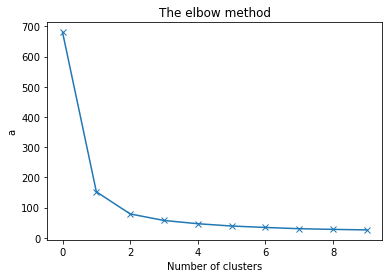

In [11]:
#plotting the elbow graph
plt.plot(a,'x-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('a')
plt.show()

In [12]:
#fitting the data in model and predicting the output
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ypred = kmeans.fit_predict(x)

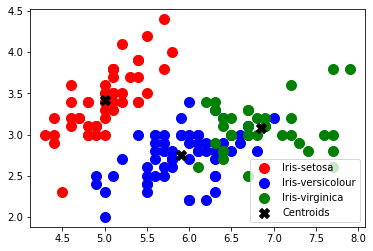

In [13]:
#plotting the data in their clusters
plt.scatter(x[ypred == 1, 0], x[ypred == 1, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[ypred == 0, 0], x[ypred == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[ypred == 2, 0], x[ypred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', marker = 'X', label = 'Centroids')

plt.legend()